<a href="https://colab.research.google.com/github/ChallaHarika23/Aimlprogram/blob/main/Module_3_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis (EDA) and Statistical Analysis

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [3]:
from google.colab import files
uploaded=files.upload()

Saving preprocessed_diabetes_data.csv to preprocessed_diabetes_data.csv


In [4]:
data = pd.read_csv('preprocessed_diabetes_data.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Identification of variables and data types

In [5]:
data.shape

(768, 9)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


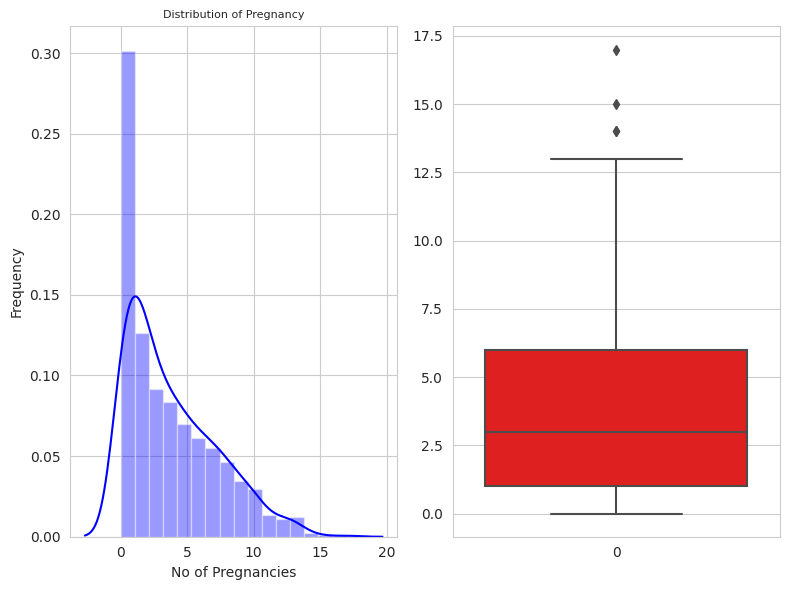

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot0=sns.distplot(data['Pregnancies'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Pregnancies')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot1=sns.boxplot(data=data['Pregnancies'], ax=axes[1],orient = 'v', color='r')
plt.tight_layout()

# TASK 1

### Find out the "Correlation" between the different attributes present in the data.
## Also plot a heatmap (refer Seaborn documentation) for the correlation values obtained.

In [8]:
#correlation between different attributes
cor_matrix = data.corr()
cor_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,0.045087,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045087,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281199,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


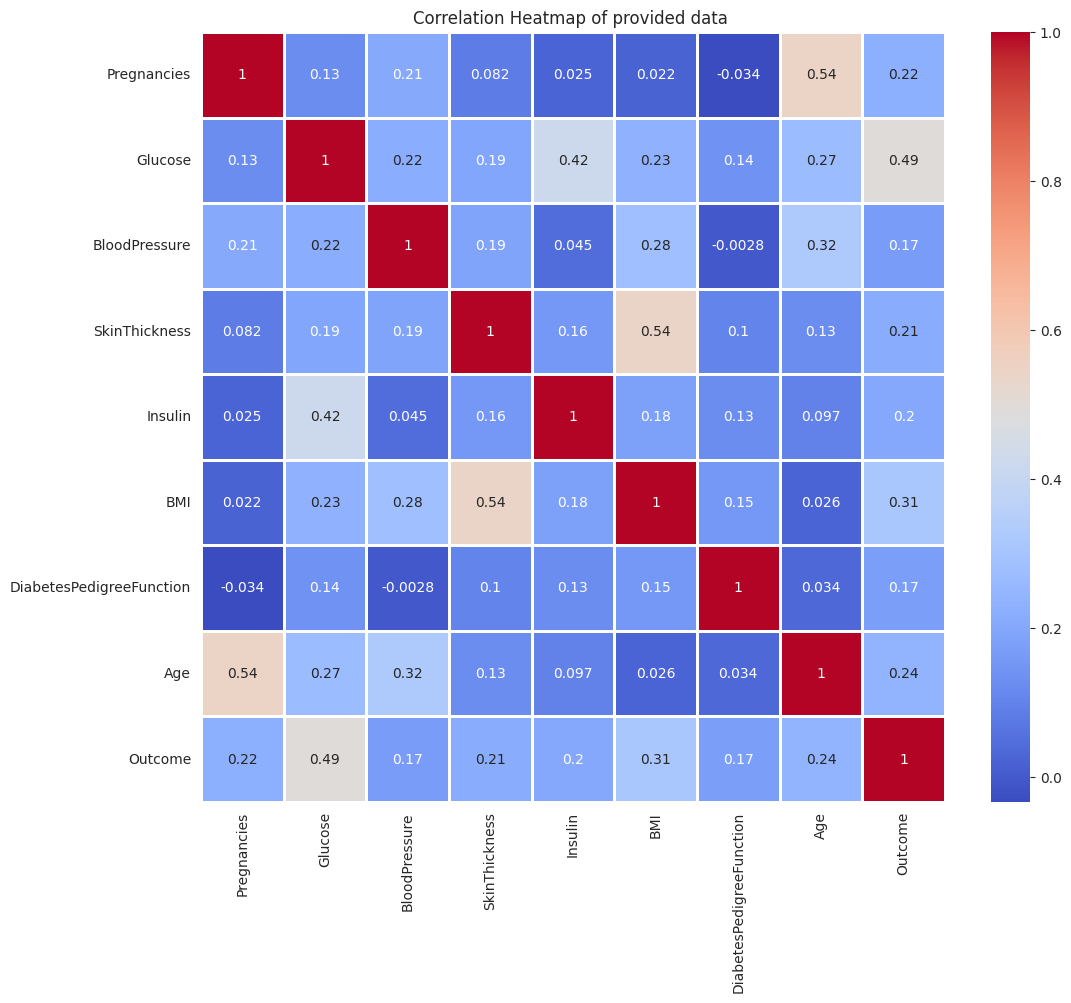

In [9]:
#heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=.8)
plt.title('Correlation Heatmap of provided data ')
plt.show()

## Checking if the data is balanced or imbalanced

0    500
1    268
Name: Outcome, dtype: int64


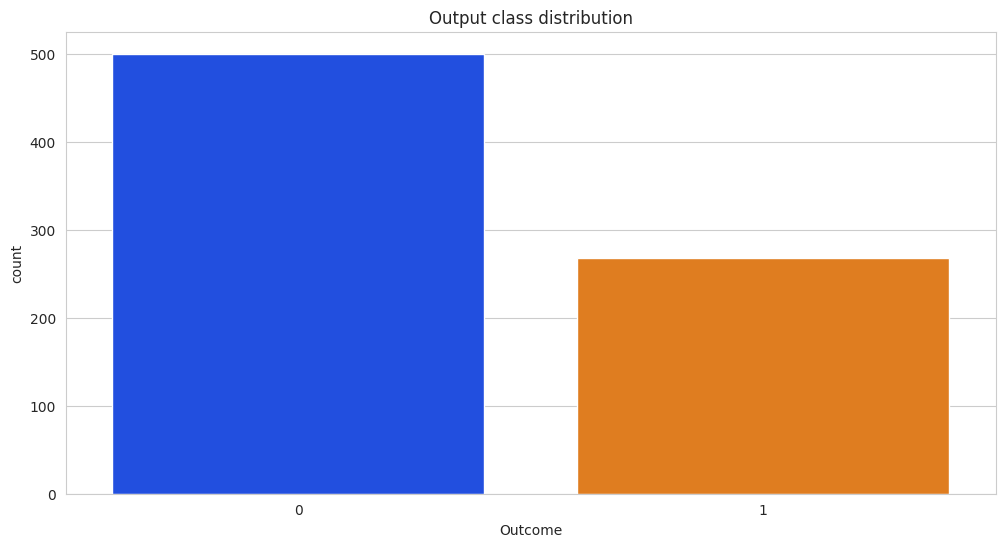

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='Outcome',data=data, palette='bright')
plt.title("Output class distribution")

print(data['Outcome'].value_counts())

## TASK 2

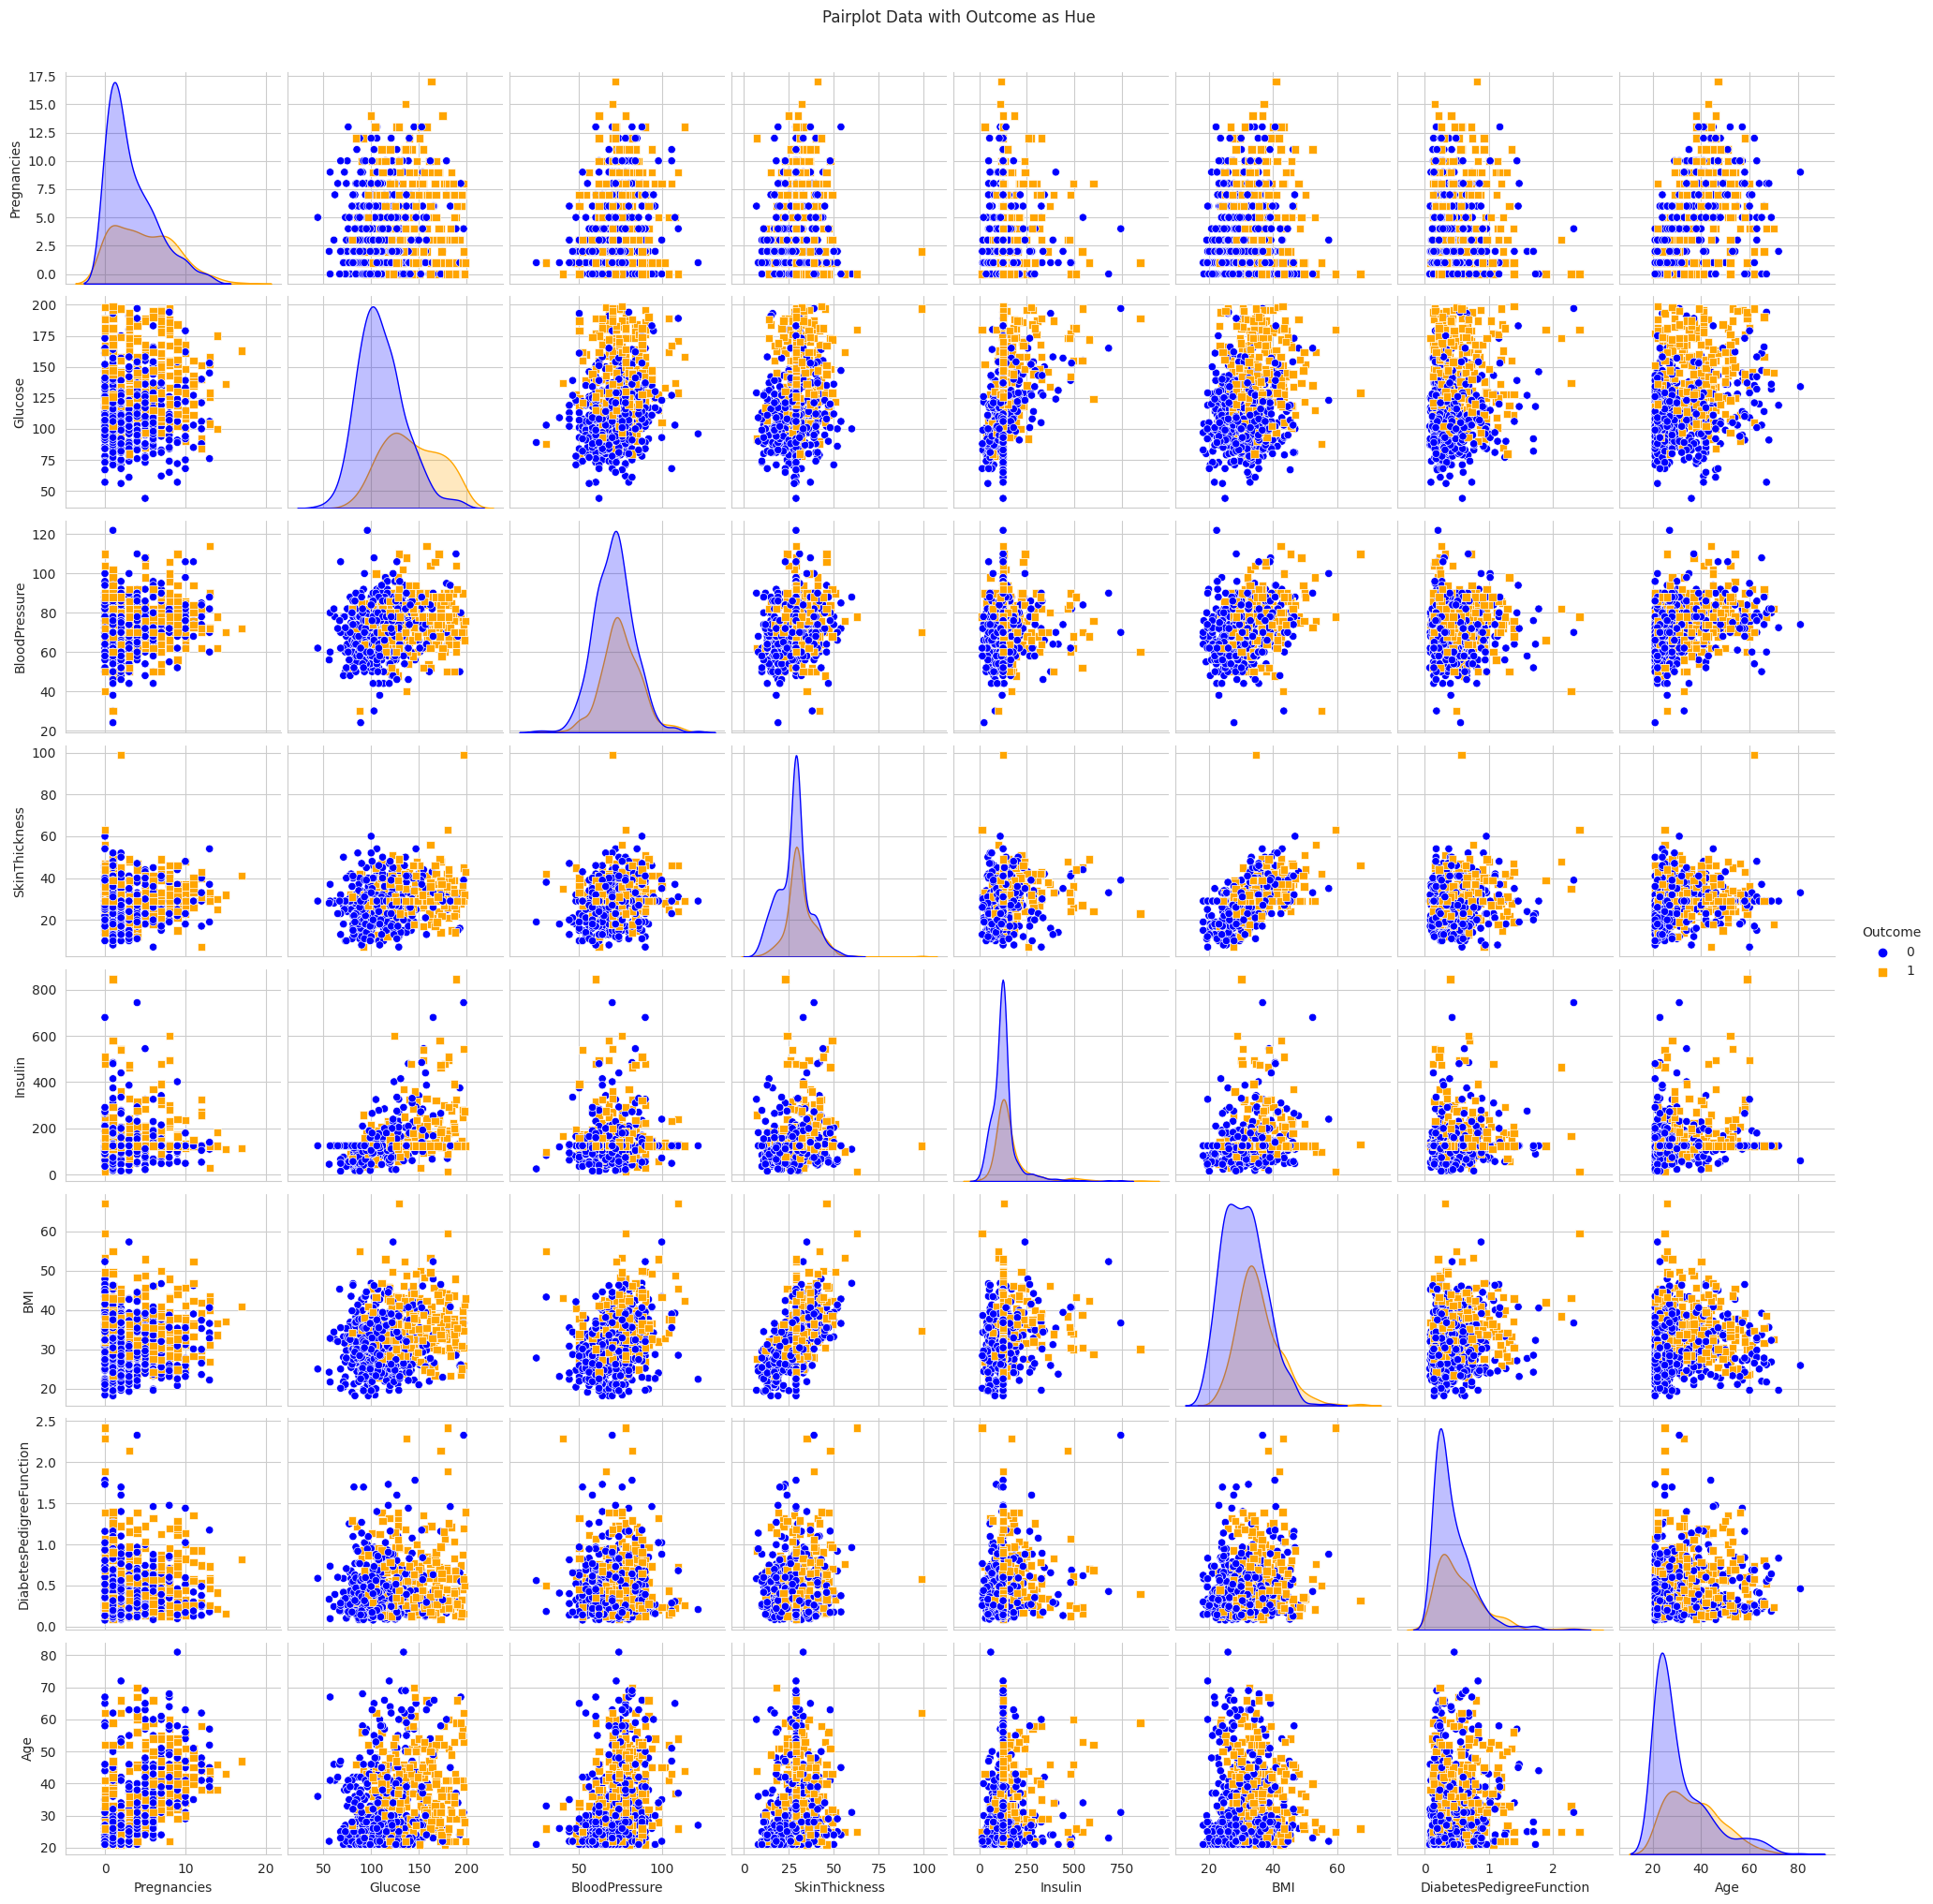

In [11]:
sns.pairplot(data, hue="Outcome", markers=["o", "s"], palette={0: 'blue', 1: 'orange'})
plt.suptitle("Pairplot Data with Outcome as Hue", y=1.02)
plt.show()

## BMI vs Outcome

<Axes: xlabel='Outcome', ylabel='BMI'>

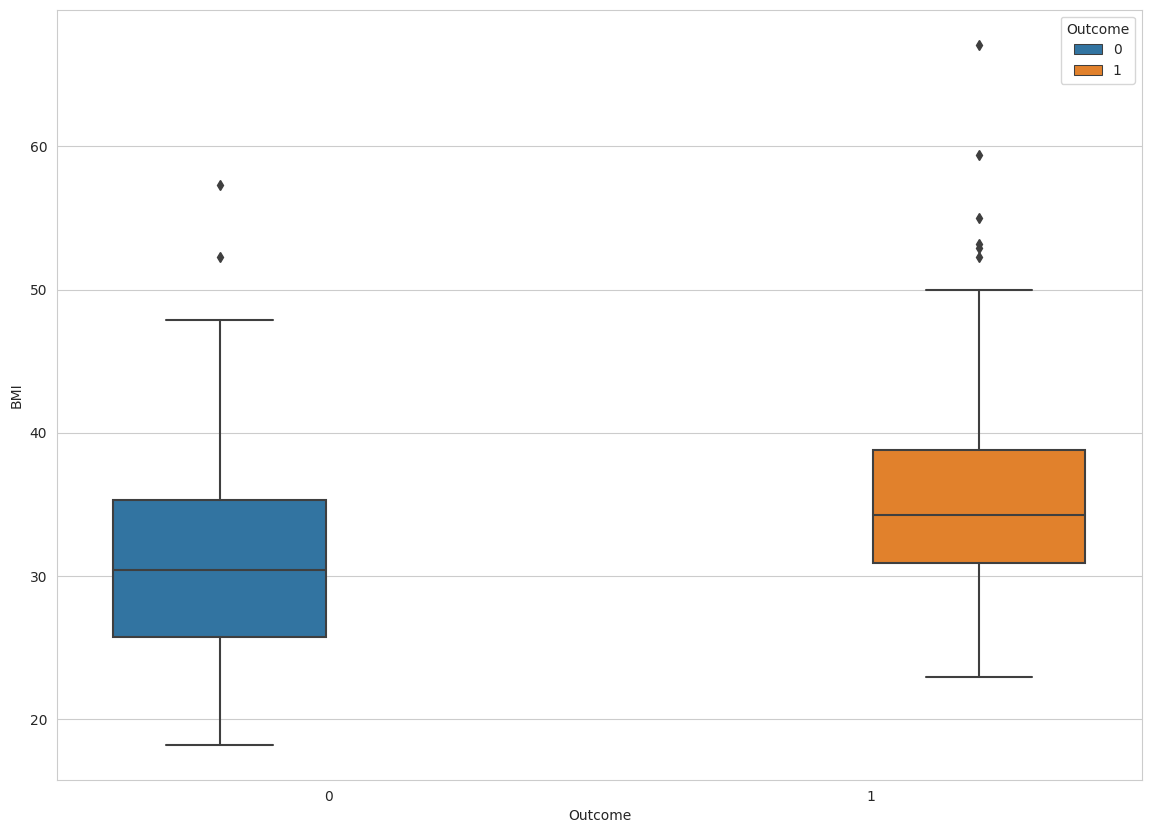

In [12]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Outcome', y='BMI',data=data, hue='Outcome')

## TASK 3

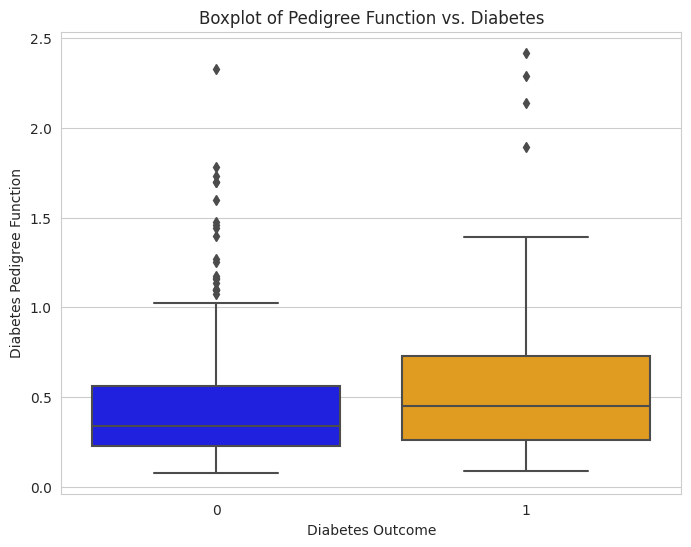

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=data, palette={0: 'blue', 1: 'orange'})
plt.title('Boxplot of Pedigree Function vs. Diabetes')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

## TASK 4

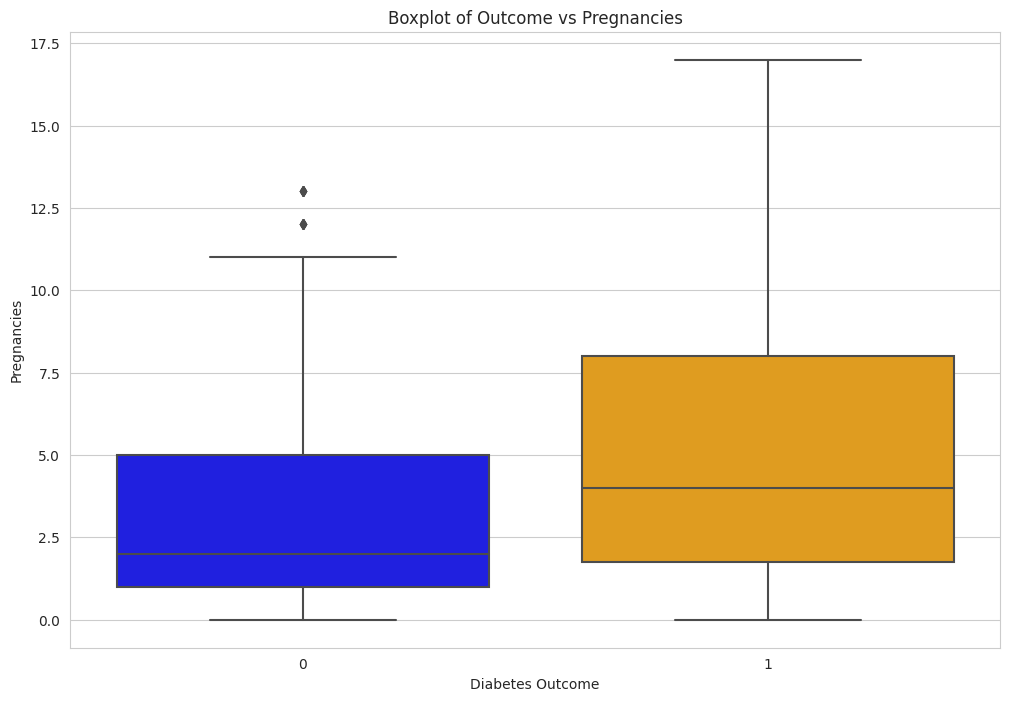

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='Pregnancies', data=data, palette={0: 'blue', 1: 'orange'})
plt.title('Boxplot of Outcome vs Pregnancies')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Pregnancies')
plt.show()

## Prevalence of Diabetes vs BMI

In [15]:
normalBMIData = data[(data['BMI'] >= 18.5) & (data['BMI'] <= 25)]
normalBMIData['Outcome'].value_counts()

0    101
1      7
Name: Outcome, dtype: int64

In [16]:
notNormalBMIData = data[(data['BMI'] < 18.5) | (data['BMI'] > 25)]
notNormalBMIData['Outcome'].value_counts()

0    399
1    261
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='BMI'>

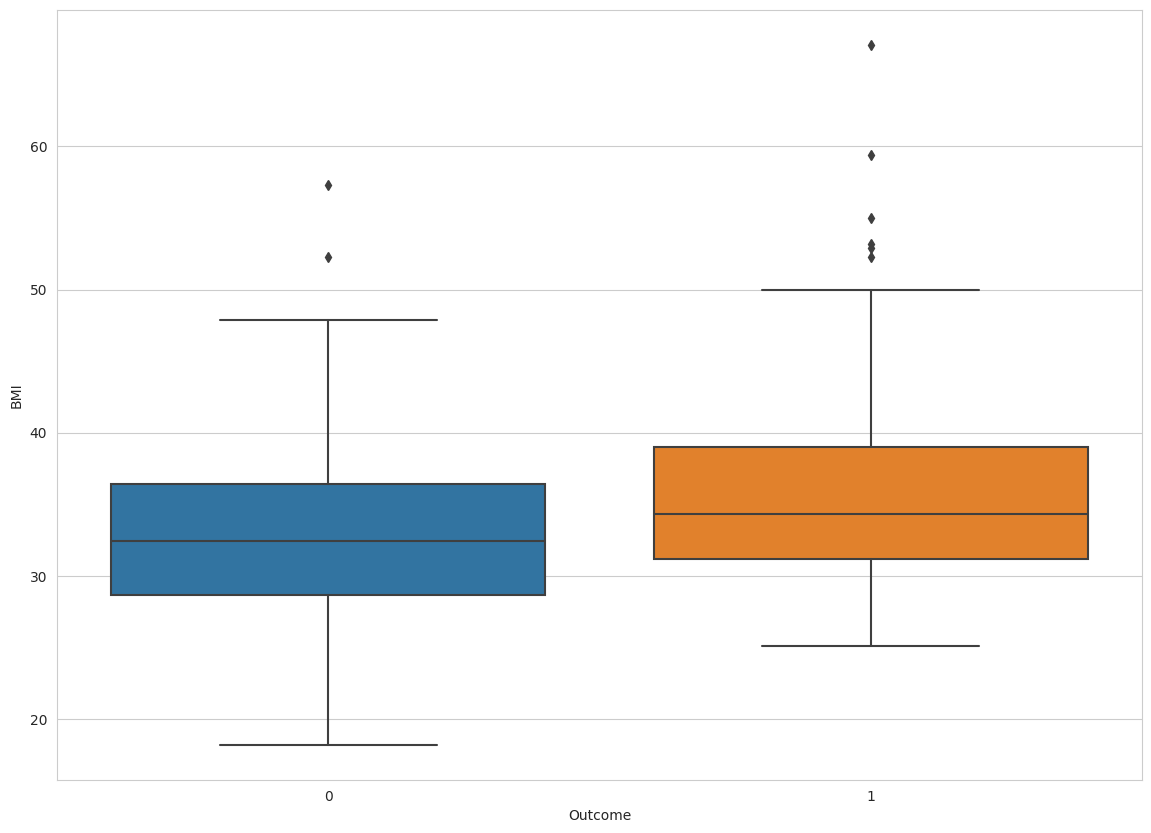

In [17]:
plt.figure(figsize=(14,10))
sns.boxplot(x='Outcome', y='BMI',data=notNormalBMIData)

## TASK 5

<Axes: xlabel='Outcome', ylabel='Age'>

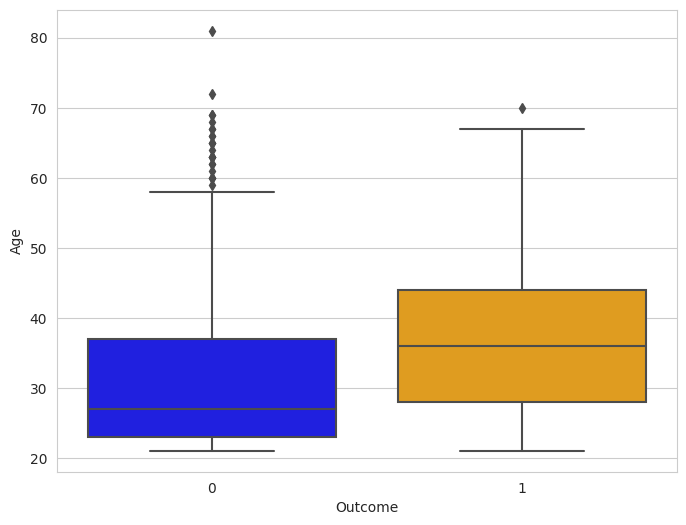

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Age', data=data, palette={0: 'blue', 1: 'orange'})

# The Importance of Standardizing Data

In [19]:
unchanged_data = data.drop('Outcome',axis=1)
unchanged_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

## TASK-6 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

In [21]:
def plot_KNN_error_rate(xdata, ydata):
    error_rate = []
    test_scores = []
    train_scores = []

    ## [REQUIRED] Split the data into train and test sets in a 70:30 ratio (70% train, 30% test)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=42)

    for i in range(1, 40):
        ## [REQUIRED] Complete the code in the next three lines
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors=i)  ## Write your code here. Initialize the KNN classifier with 'i' neighbours (expected lines ~ 1)
        knn.fit(X_train, y_train)  ## Write your code here. Fit the KNN model on the training set (expected lines ~ 1)
        pred_i = knn.predict(X_test)  ## Write your code here. Make predictions on the test set using KNN (expected lines ~ 1)

        error_rate.append(np.mean(pred_i != y_test))
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    plt.figure(figsize=(12, 8))
    plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print()
    ## score that comes from testing on the same datapoints that were used for training
    max_train_score = max(train_scores)
    train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
    print('Max train score {} % and k = {}'.format(max_train_score * 100, list(map(lambda x: x + 1, train_scores_ind))))
    print()
    ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
    max_test_score = max(test_scores)
    test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
    print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

    return test_scores



Max train score 100.0 % and k = [1]

Max test score 73.16017316017316 % and k = [27, 28]


[0.683982683982684,
 0.7056277056277056,
 0.6926406926406926,
 0.70995670995671,
 0.670995670995671,
 0.7012987012987013,
 0.696969696969697,
 0.696969696969697,
 0.70995670995671,
 0.7186147186147186,
 0.7056277056277056,
 0.7056277056277056,
 0.7186147186147186,
 0.70995670995671,
 0.7142857142857143,
 0.70995670995671,
 0.7142857142857143,
 0.6883116883116883,
 0.7056277056277056,
 0.7186147186147186,
 0.70995670995671,
 0.7186147186147186,
 0.7186147186147186,
 0.7142857142857143,
 0.7272727272727273,
 0.7186147186147186,
 0.7316017316017316,
 0.7316017316017316,
 0.7272727272727273,
 0.7272727272727273,
 0.7229437229437229,
 0.7229437229437229,
 0.7186147186147186,
 0.7272727272727273,
 0.7142857142857143,
 0.7186147186147186,
 0.7056277056277056,
 0.7056277056277056,
 0.7012987012987013]

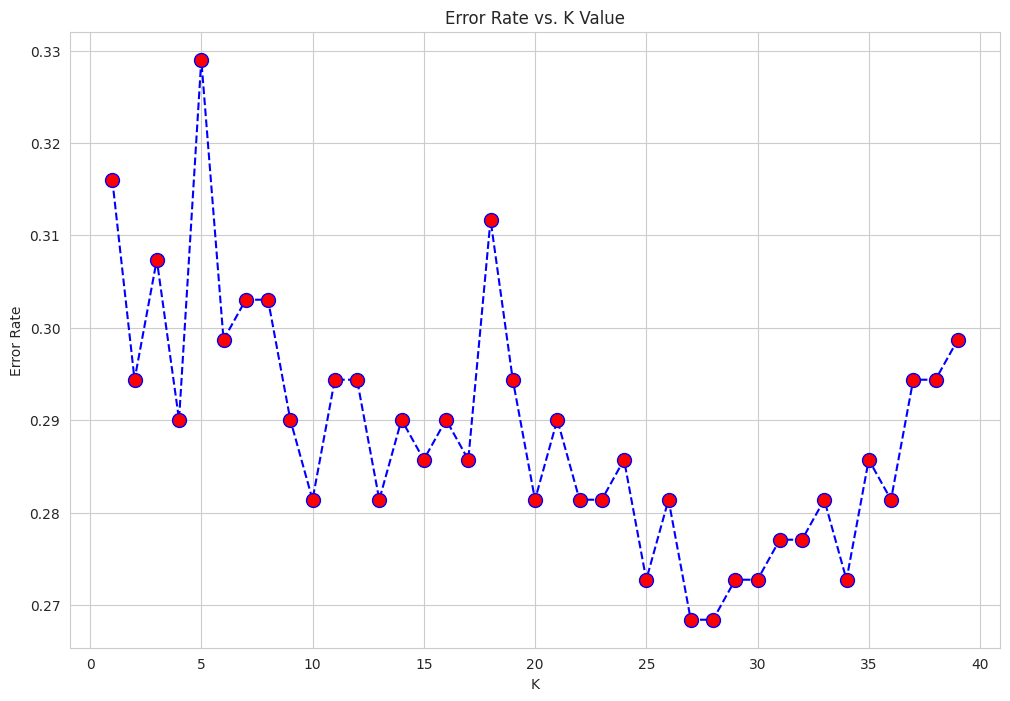

In [22]:
unchanged_test_scores = plot_KNN_error_rate(unchanged_data,data['Outcome'])
unchanged_test_scores

## Standardize the Variables

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
scaler.fit(data.drop('Outcome',axis=1))

StandardScaler()

In [25]:
sca_data = scaler.transform(data.drop('Outcome',axis=1))
sca_data

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [26]:
df_feat = pd.DataFrame(sca_data,columns=data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496



Max train score 100.0 % and k = [1]

Max test score 75.75757575757575 % and k = [23, 24]


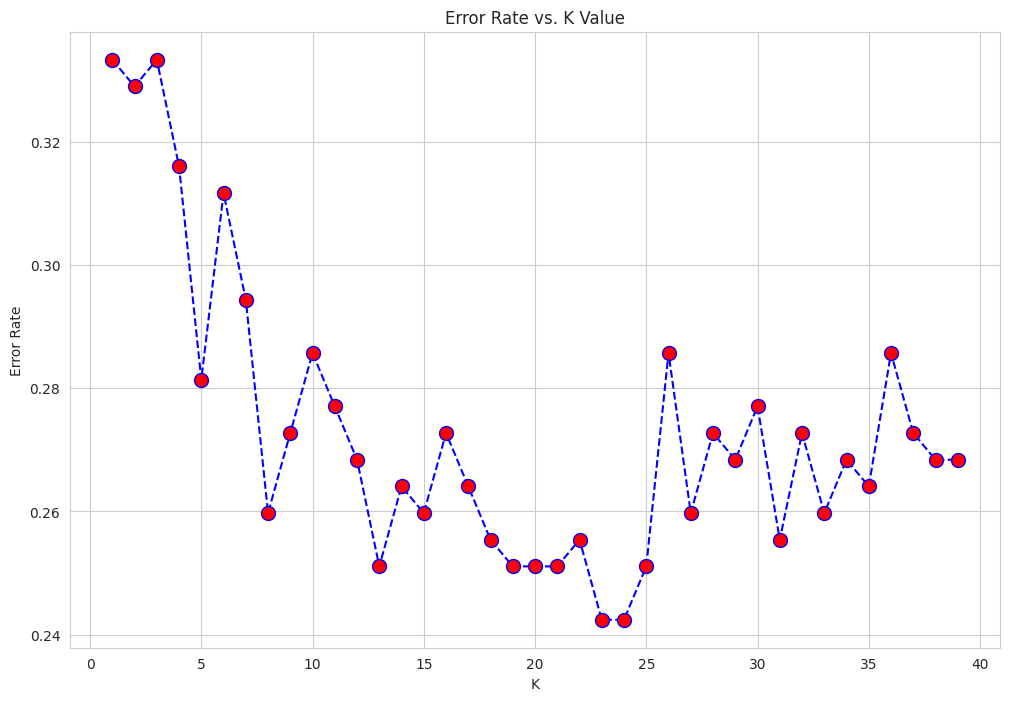

In [27]:
scaled_test_scores = plot_KNN_error_rate(sca_data,data['Outcome'])

# Comparing Accuracy before and after Standardization

<Axes: title={'center': 'Accuracy vs K Value'}>

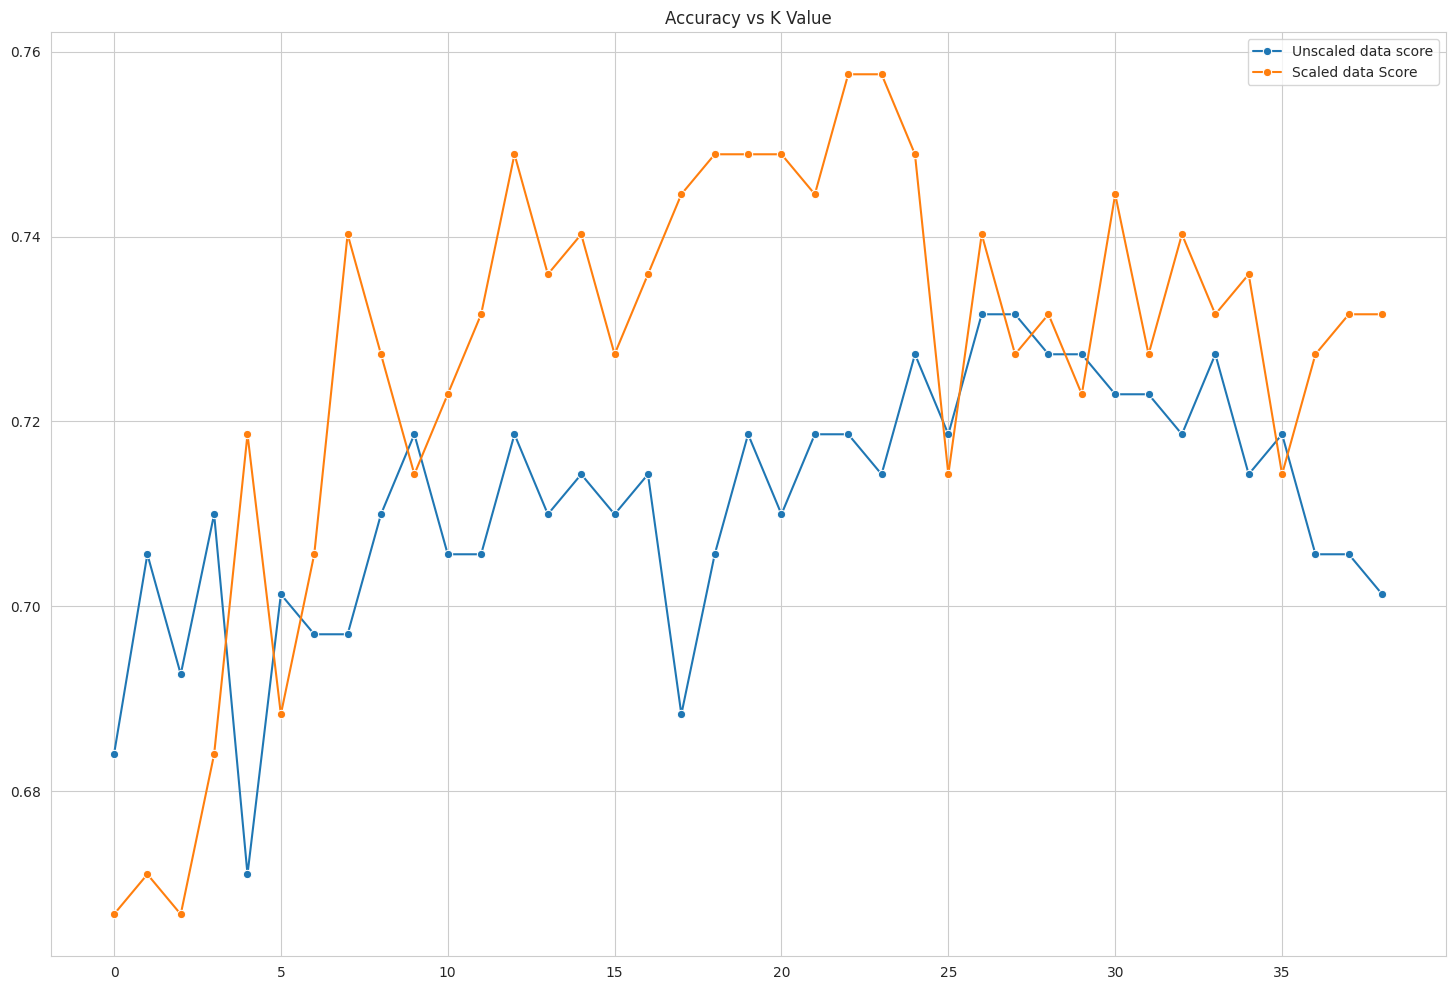

In [28]:
plt.figure(figsize=(18,12))
plt.title('Accuracy vs K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data score')
sns.lineplot(scaled_test_scores,marker='o',label='Scaled data Score')

#TASK-7: Refer to MinMax Scaler provided in scikit-learn.
## Use MinMax scaling on the dataset, and see the performance of KNN on this minmax-scaled dataset.

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [30]:
scaler.fit(data.drop('Outcome',axis=1))

MinMaxScaler()

In [31]:
scaled_data = scaler.transform(data.drop('Outcome',axis=1))

In [32]:
df_feat = pd.DataFrame(scaled_data,columns=data.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.133413,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.133413,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.239130,0.133413,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000



Max train score 100.0 % and k = [1]

Max test score 77.05627705627705 % and k = [22, 27, 33, 37]


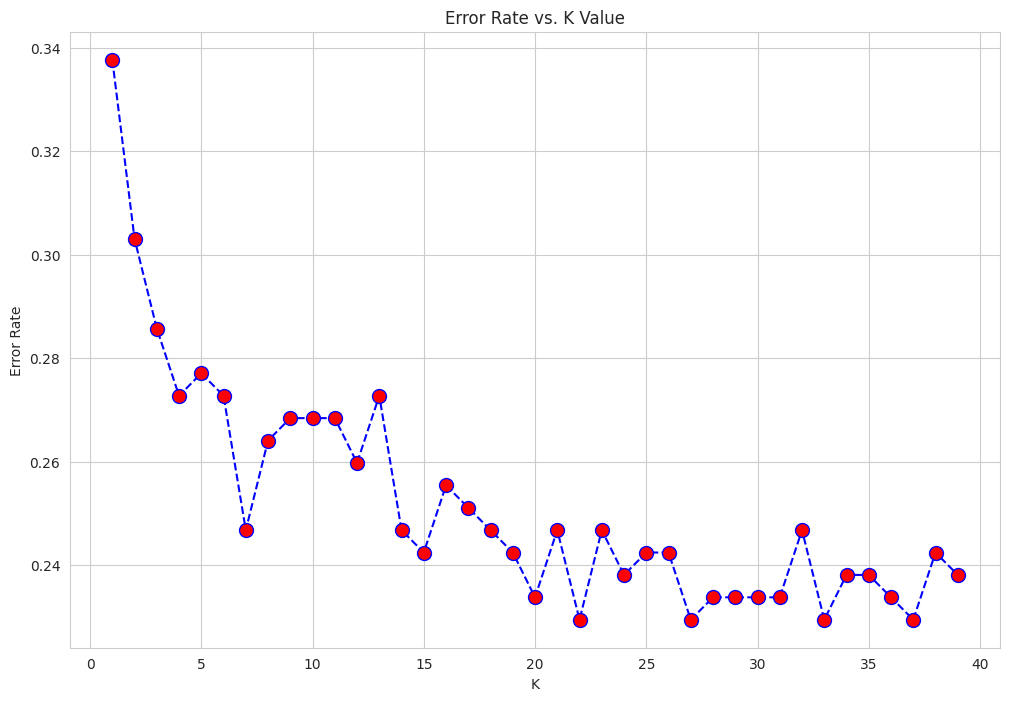

In [33]:
scaled_scores = plot_KNN_error_rate(scaled_data,data['Outcome'])

<Axes: title={'center': 'Accuracy vs K Value'}>

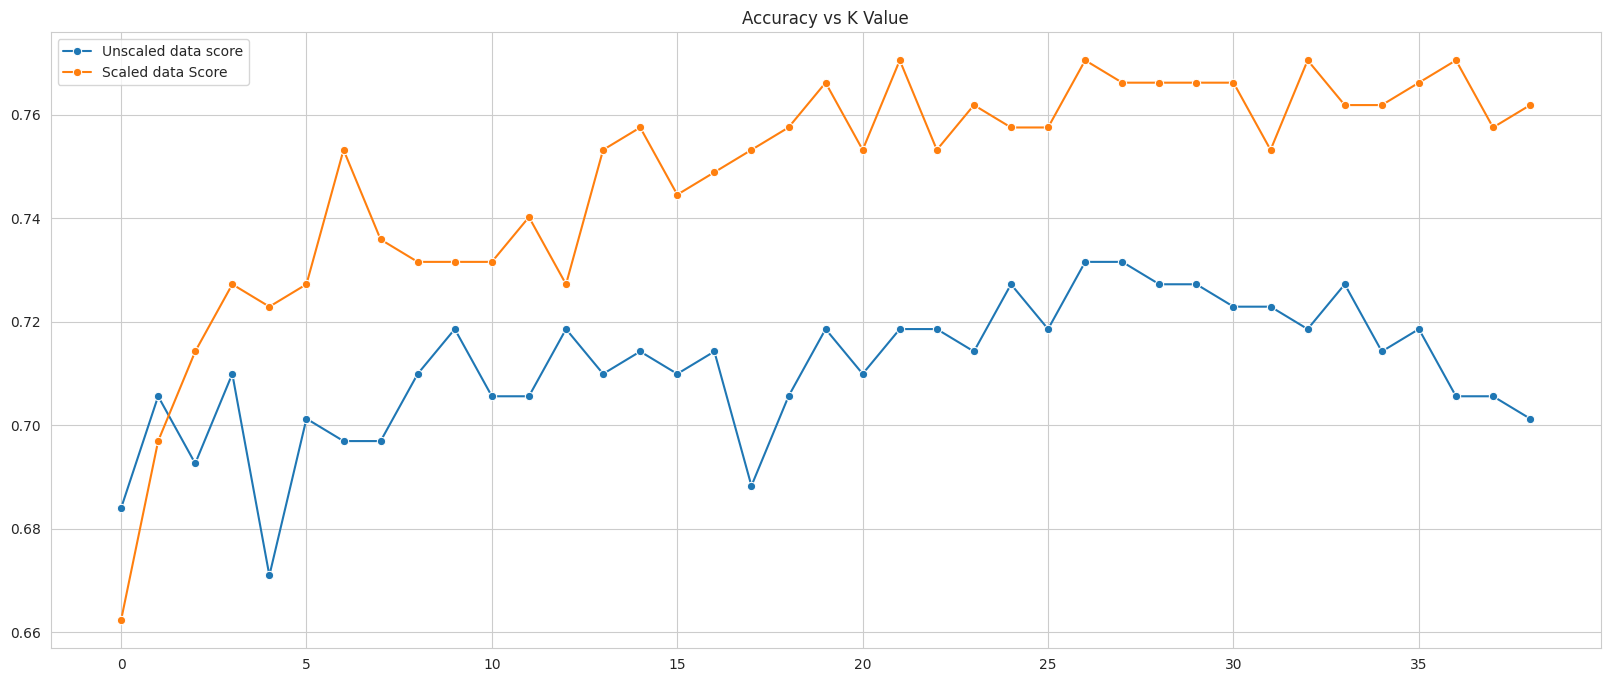

In [34]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data score')
sns.lineplot(scaled_scores,marker='o',label='Scaled data Score')

# TASK-8: Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.

In [38]:
from sklearn.model_selection import cross_val_score, KFold

In [44]:
y = data['Outcome']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
scores_unscaled = cross_val_score(knn_unscaled, unchanged_data, y, cv=kf)
print("KNN without Scaling - Cross-validated Accuracy:", np.mean(scores_unscaled))

KNN without Scaling - Cross-validated Accuracy: 0.7070622188269248


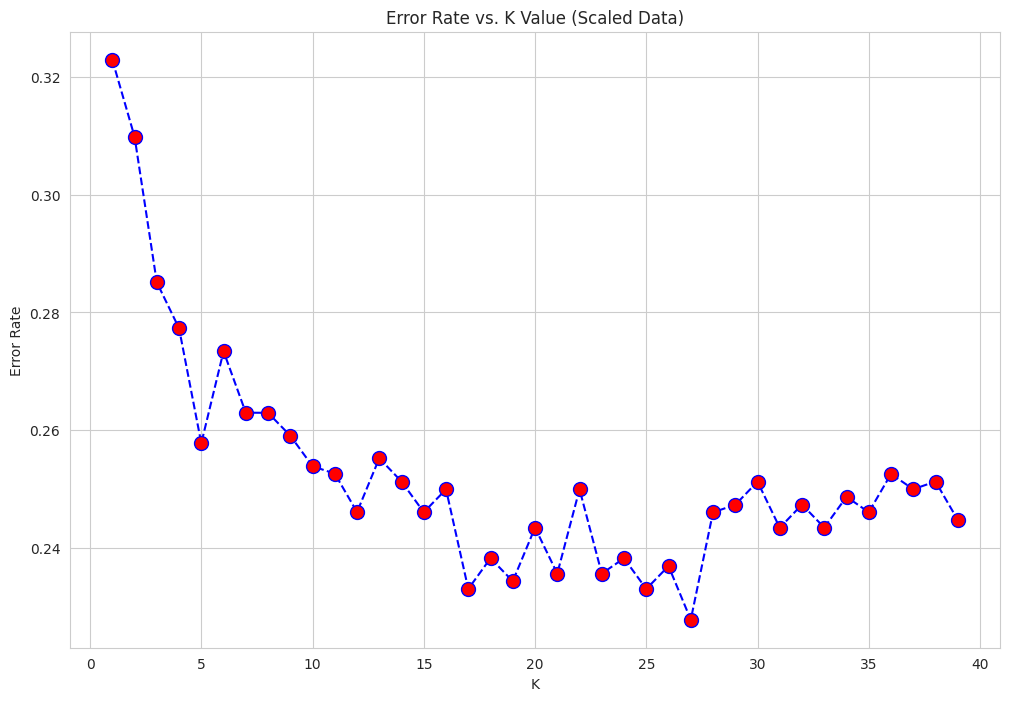

KNN with StandardScaler - Cross-validated Accuracy: 0.7421950598421188


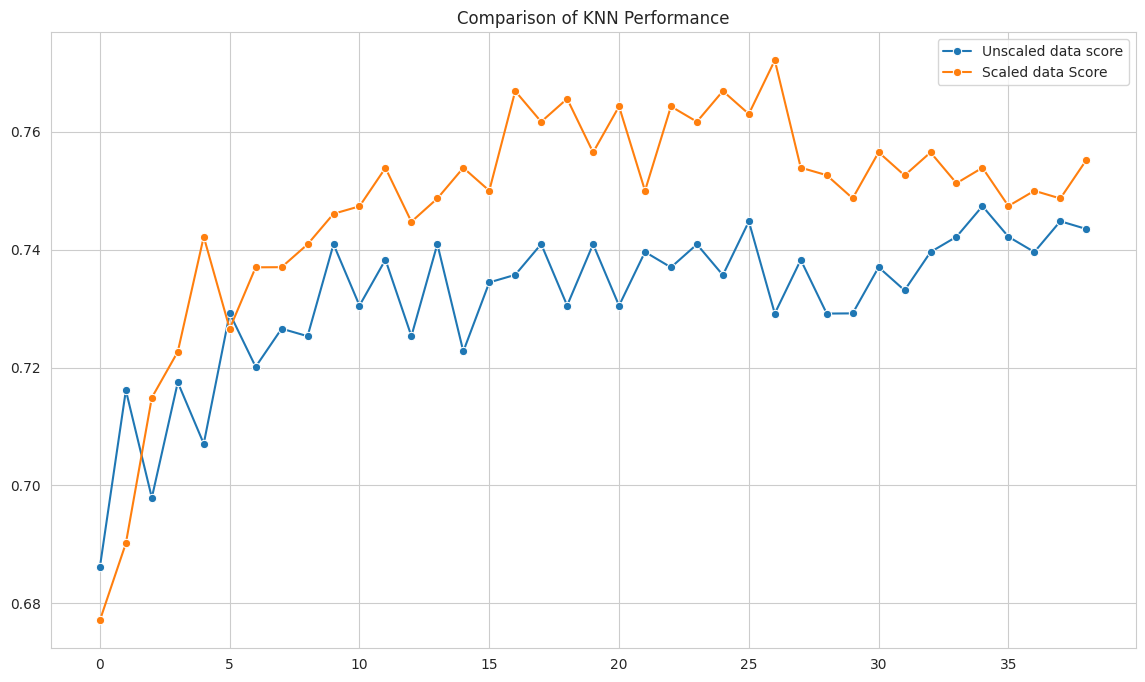

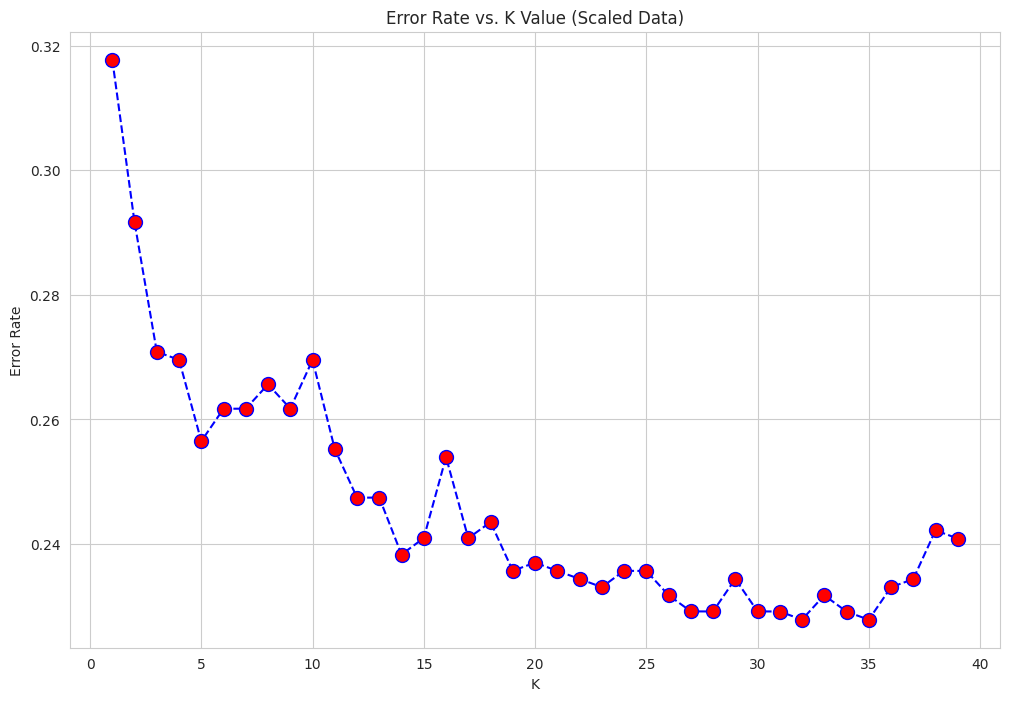

KNN with MinMaxScaler - Cross-validated Accuracy: 0.7435022493846024


<Axes: title={'center': 'Comparison of KNN Performance'}>

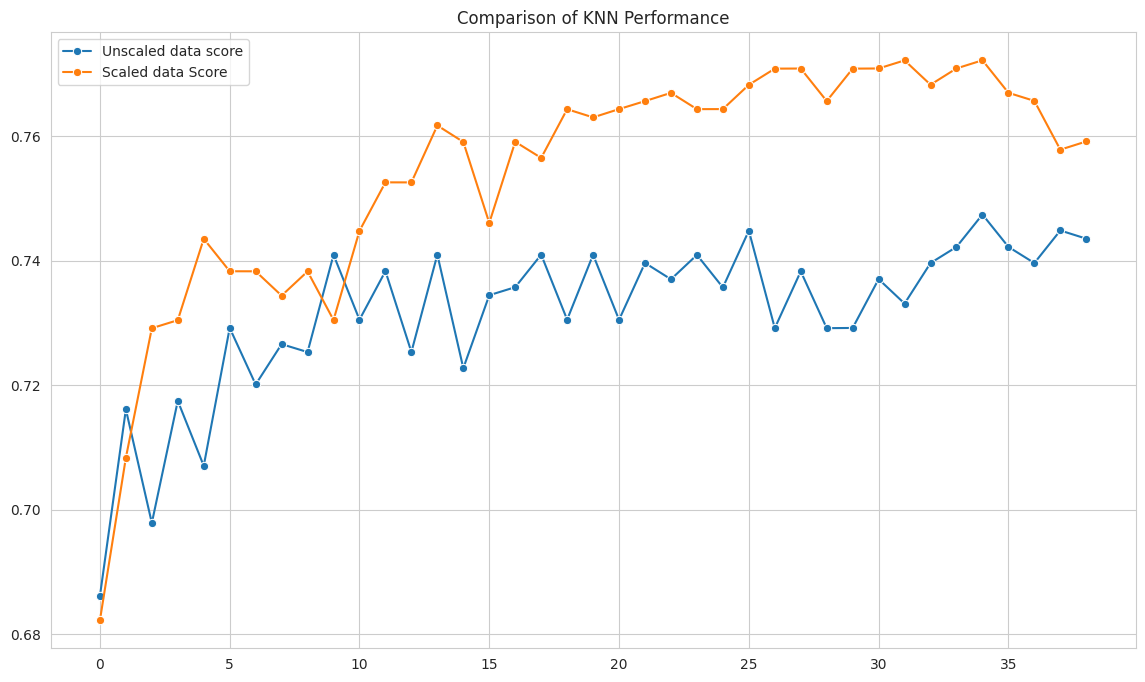

In [52]:
# KNN with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(unchanged_data)
knn_standard = KNeighborsClassifier(n_neighbors=5)
scores_standard = cross_val_score(knn_standard, X_scaled, y, cv=kf)
scaled_scores = plot_KNN_error_rate(X_scaled, y, title="Error Rate vs. K Value (Scaled Data)")
print("KNN with StandardScaler - Cross-validated Accuracy:", np.mean(scores_standard))
plt.figure(figsize=(14,8))
plt.title('Comparison of KNN Performance')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data score')
sns.lineplot(scaled_scores,marker='o',label='Scaled data Score')

# KNN with MinMaxScaler
scaler_minmax = MinMaxScaler()
X_scaled_minmax = scaler_minmax.fit_transform(unchanged_data)
knn_minmax = KNeighborsClassifier(n_neighbors=5)
scores_minmax = cross_val_score(knn_minmax, X_scaled_minmax, y, cv=kf)
scaled_scores = plot_KNN_error_rate(X_scaled_minmax, y, title="Error Rate vs. K Value (Scaled Data)")
print("KNN with MinMaxScaler - Cross-validated Accuracy:", np.mean(scores_minmax))
plt.figure(figsize=(14,8))
plt.title('Comparison of KNN Performance')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data score')
sns.lineplot(scaled_scores,marker='o',label='Scaled data Score')

# Conclusion
From the data , it seems that there is some form of an association between BMI, number of pregnancies, pedigree function, and the outcome attribute in diabetes data.

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered.so scaling is most importtant part while preprocessing the data.It palys a cruical role for improving the performance of model.